![Usa Jesus.PNG](https://i.ibb.co/nf4Fd4q/Usa-Jesus.png)

#**Regresion Lineal multivariable**

La regresión lineal múltiple trata de ajustar modelos lineales o linealizables entre una variable dependiente y más de una variables independientes. La regresión es una técnica estadística que consiste en calcular dicha correlacion entre par de variables en forma de función matemática. Esta función nos ofrece mucha más información sobre dicha relación. Por ejemplo, el modelo más sencillo: la regresión lineal simple, ya nos informa de las siguientes magnitudes: la magnitud de la correlación; el incremento marginal, el valor de una de ellas cuando la otra es cero y si dicha relación puede considerarse significativa o fuerte (distinta de una relación normal) o no significativa o débil (similar a una relación normal)

###**Scikit-Learn**

*Scikit-Learn* es una de estas librerías gratuitas para Python. Cuenta con algoritmos de clasificación, regresión, clustering y reducción de dimensionalidad. Además, presenta la compatibilidad con otras librerías de Python como NumPy, SciPy y matplotlib.

La gran variedad de algoritmos y utilidades de Scikit-learn la convierten en la herramienta básica para empezar a programar y estructurar los sistemas de análisis datos y modelado estadístico. Los algoritmos de Scikit-Learn se combinan y depuran con otras estructuras de datos y aplicaciones externas como Pandas o PyBrain.

*Modelo de regresión lineal Scikit-Learn:*
[enlace](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

*Ejemplo de regresion lineal sklearn:*
[enlace](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)


##**1. Importe de librerias:** Pandas, Numpy, Seaborn, Matplotlib

*- Adicional se importal el modelo de regresion lineal por **sklearn**.*

In [32]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns        
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

##**2. Cargue del data set:** 
Realizamos el importe de nuestro data set *countries by happiness level* [*2018*](https://raw.githubusercontent.com/jchaves1406/Machine-Learning/main/Modelos%20Machine%20Learning/2018.csv), [*2019*](https://raw.githubusercontent.com/jchaves1406/Machine-Learning/main/Modelos%20Machine%20Learning/2019.csv)  el cual se encuentra en archivos independientes separado por años. En primer lugar procederemos a extraerlos en variables independientes para luego concatenarlos en una sola variable la cual tendrá toda la información de nuestro data set, pero con los datos sin normalizar. En nuestro data set la columna *score* corresponderá a nuestras variables independientes (***Target***), de manera que las demas columnas serán nuestras variables dependientes (***Features***).

In [33]:
year_2018 = pd.read_csv("2018.csv");
year_2019 = pd.read_csv("2019.csv");

dataFrameCountries = pd.concat([year_2018,year_2019],sort=False)
dataFrameCountries.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


##**2.1 Descripcion de variables:** 

1. Overall rank: Ranking de los paises con mayor percepcion de felicidad.
2. Country or region: Nombre del pais o region.
3. Score: Puntaje de satisfaccion.
4. GDP per capita: Valor que representa los niveles de ingresos y gastos del país.
5. Social support: Apoyo o inversion social.
6. Healthy life expectancy: Esperanza de vida saludable.
7. Freedom to make life choices: Percepcion de libertad para tomar decisiones en la vida.
8. Generosity: Percepcion de generosidad.
9. Perceptions of corruption: Percepcion de corrupcion

##**2.2 Visualizacion estadistica de los datos:** 

El método **DataFrame.describe()** genera estadísticas descriptivas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores de NaN. Este método nos dice muchas cosas sobre un conjunto de datos. Una cosa importante es que el método describe () trata solo con valores numéricos. No funciona con valores categóricos. Entonces, si hay valores categóricos en una columna, el método describe () lo ignorará y mostrará un resumen para las otras columnas a menos que se pase el parámetro include = "all".

Ahora, entendamos las estadísticas que se generan con el método describe ():
* count nos dice el número de filas vacías NoN en una característica.
* mean nos dice el valor medio de esa característica.
* std nos dice el valor de desviación estándar de esa característica.
* min nos dice el valor mínimo de esa característica.
* 25%, 50% y 75% son el percentil / cuartil de cada característica. Esta información de cuartiles nos ayuda a detectar valores atípicos.
* max nos dice el valor máximo de esa característica.

Fuente: [pandas docs(DataFrame.describe)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe)

In [34]:
dataFrameCountries.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,312.0,78.500000,45.104737,1.000,39.75000,78.5000,117.25000,156.000
Score,312.0,5.391506,1.114631,2.853,4.51425,5.3795,6.17600,7.769
GDP per capita,312.0,0.898298,0.394592,0.000,0.60950,0.9600,1.21950,2.096
Social support,312.0,1.211026,0.300310,0.000,1.05575,1.2655,1.45750,1.644
Healthy life expectancy,312.0,0.661295,0.252724,0.000,0.48825,0.6990,0.85800,1.141
Freedom to make life choices,312.0,0.423538,0.156024,0.000,0.32250,0.4495,0.54025,0.724
Generosity,312.0,0.182926,0.096739,0.000,0.10875,0.1755,0.24500,0.598
Perceptions of corruption,311.0,0.111299,0.095365,0.000,0.05000,0.0820,0.14050,0.457


##**2.3 Renombrar variables:**
Podemos cambiar el nombre de nuestras variables para dar un manejo mas optimo a nuestro dataFrame. Adicional podemos eliminar variables que no sean relevantes dentro para el analisis. 

In [35]:
#Renombrar variables:
dataFrameCountries.rename(columns={
    "Overall rank": "rank",
    "Country or region": "country",
    "Score": "score",
    "GDP per capita": "gdp",
    "Social support": "social",
    "Healthy life expectancy": "healthy",
    "Freedom to make life choices": "freedom",
    "Generosity": "generosity",
    "Perceptions of corruption": "corruption"
},inplace=True)

In [36]:
#Eliminar la columna de 'Overall rank' debido a que no es un dato relevante en nuestro dataFrame
del dataFrameCountries["rank"]


##**2.4 Información del dataFrame:** Tipos de datos

Para saber que tipo de datos tiene nuestro dataFrame usaremos el metodo ***.info()*** el cual mostrara el tipo de dato de cada una de nuestras variables. Proporciona información sobre los tipos de datos, columnas, recuentos de valores nulos, uso de memoria, etc.

Fuente: [pandas docs(DataFrame.info)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html)

In [38]:
dataFrameCountries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 155
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     312 non-null    object 
 1   score       312 non-null    float64
 2   gdp         312 non-null    float64
 3   social      312 non-null    float64
 4   healthy     312 non-null    float64
 5   freedom     312 non-null    float64
 6   generosity  312 non-null    float64
 7   corruption  311 non-null    float64
dtypes: float64(7), object(1)
memory usage: 21.9+ KB



##**2.5 Valores nulos**
Realizamos una búsqueda en el dataFrame para encontrar datos nulos que puedan afectar nuestro análisis, en caso de haber eliminaremos los datos del país para así evitar errores en los resultados del análisis posterior.

In [39]:
# Busqueda de posiciones nulas en el dataFrame
dataFrameCountries.columns[dataFrameCountries.isnull().any()]

Index(['corruption'], dtype='object')

In [40]:
# Podemos hacer un conteo de todos los valores nulos en nuestro dataFrame de la siguiente manera:
dataFrameCountries.isnull().sum()

country       0
score         0
gdp           0
social        0
healthy       0
freedom       0
generosity    0
corruption    1
dtype: int64

In [41]:
# Encontramos el pais que posee el dato null
dataFrameCountries[dataFrameCountries["corruption"].isnull()]

,country,score,gdp,social,healthy,freedom,generosity,corruption
19,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [42]:
# Eliminar pais o paises que contengan celdas nulas
dataFrameCountries = dataFrameCountries.dropna()

##**3 Preparacion del dataFrame**
Se dice que el 95% de un modelo de aprendizaje automático es preprocesamiento y el 5% es selección de modelo. Para ello, necesitamos enseñar los datos al modelo correctamente. Para preparar los datos disponibles para el aprendizaje automático, debemos aplicar ciertos métodos de preprocesamiento. Uno de estos métodos es el análisis de valores atípicos (**Outliers**). El valor atípico es cualquier punto de datos que sea sustancialmente diferente del resto de las observaciones en un conjunto de datos. En otras palabras, es la observación la que va mucho más allá de la tendencia general.

![](https://miro.medium.com/max/854/1*RW-vfIbKZh-UGsLfTAWpyw.png)

##**3.1 Outliers**
Los valores atípicos se comportan de manera diferente a otros modelos de datos y aumentan el error con el sobreajuste, por lo que se debe detectar el modelo atípico y se deben realizar algunas operaciones en él.
###**Uso de un gráfico de caja**
Podemos ver observaciones contradictorias con muchas técnicas de visualización. Uno de ellos es el gráfico de cajas. Si hay un valor atípico, se dibuja como el punto, pero la otra población se agrupa y se muestra en cuadros.

In [43]:
df = dataFrameCountries.copy()
df = df.select_dtypes(include=["float64","int64"])
df.head()

,score,gdp,social,healthy,freedom,generosity,corruption
0,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,7.487,1.420,1.549,0.927,0.660,0.256,0.357


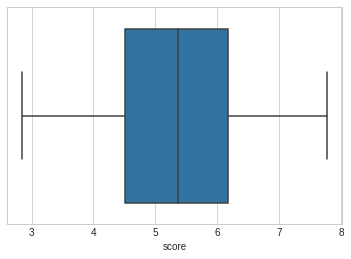

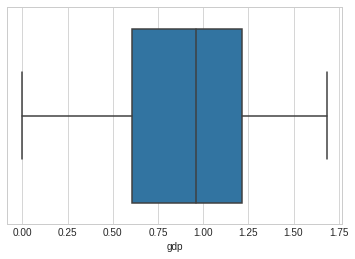

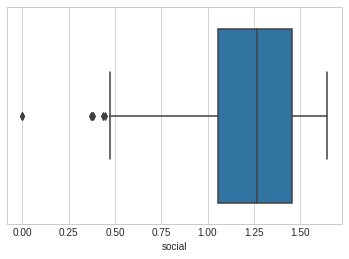

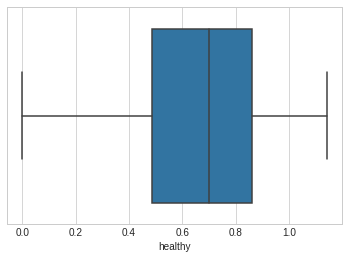

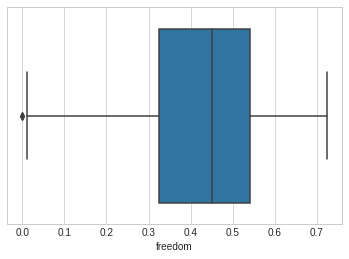

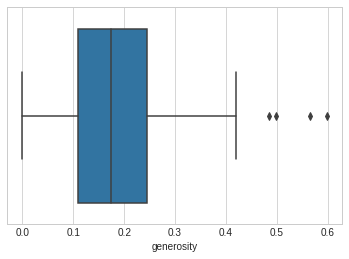

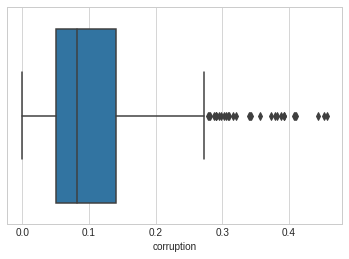

In [44]:
column_list = ["score","gdp","social","healthy","freedom","generosity","corruption"]
for col in column_list:
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.show()

Hemos observado que hay valores atípicos en la columna "social" y "corrupción". Esto puede hacer que nos afecte negativamente mientras entrenamos nuestro conjunto de datos.


Para corregir estos valores atipicos usaremos el IQR que es la diferencia entre Q3 y Q1 y se denomina rango intercuartil o IQR. Cualquier punto de datos menor que el límite inferior o mayor que el límite superior se considera un valor atípico.

In [45]:
# Para "corruption"
df_table = df['corruption']

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("El limite inferior es: " + str(lower_bound))
print("El limite superior es: " + str(upper_bound))
print("Q1: ", Q1)
print("Q3: ", Q3)

El limite inferior es: -0.08575
El limite superior es: 0.27625
Q1:  0.05
Q3:  0.1405


In [46]:
# Vector de valores atipicos
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound))
outliers_vector

0       True
1       True
2       True
3      False
4       True
       ...  
151     True
152    False
153    False
154    False
155    False
Name: corruption, Length: 311, dtype: bool

In [47]:
outliers_vector = df_table[outliers_vector]
outliers_vector.index.values

array([  0,   1,   2,   4,   5,   6,   7,   8,   9,  13,  14,  16,  33,
        75,  97, 150,   0,   1,   2,   4,   5,   6,   7,   8,  10,  13,
        14,  15,  33,  75, 151])


* La eliminación de datos no es adecuada para este conjunto de datos. Es por eso que completaremos los valores atípicos con el promedio.

In [48]:
df_table = dataFrameCountries.copy()
df_table["corruption"].iloc[outliers_vector.index.values] = df_table["corruption"].mean()
df_table["corruption"].iloc[outliers_vector.index.values]

0      0.111299
1      0.111299
2      0.111299
4      0.111299
5      0.111299
6      0.111299
7      0.111299
8      0.111299
9      0.111299
13     0.111299
14     0.111299
16     0.111299
34     0.111299
76     0.111299
98     0.111299
151    0.111299
0      0.111299
1      0.111299
2      0.111299
4      0.111299
5      0.111299
6      0.111299
7      0.111299
8      0.111299
10     0.111299
13     0.111299
14     0.111299
15     0.111299
34     0.111299
76     0.111299
152    0.111299
Name: corruption, dtype: float64

In [49]:
# Sustituimos con el promedio de los valores atipicos
dataFrameCountries = df_table

##**4. Matriz de correlación:**

Para construir nuestra matriz de correlación normalizada de nuestro dataFrame usaremos el método de normalización de la librería pandas ***dataFrame.corr()*** la cual se encargara de realizar la normalización de nuestra matriz.

In [50]:
matrizCorrNoNorm = dataFrameCountries.corr()
matrizCorrNoNorm

,score,gdp,social,healthy,freedom,generosity,corruption
score,1.000000,0.799764,0.771401,0.757621,0.545533,0.106783,0.260286
gdp,0.799764,1.000000,0.741045,0.828661,0.357517,-0.045785,0.218885
social,0.771401,0.741045,1.000000,0.670643,0.417982,-0.014267,0.105249
healthy,0.757621,0.828661,0.670643,1.000000,0.301978,0.001473,0.235859
freedom,0.545533,0.357517,0.417982,0.301978,1.000000,0.275441,0.349671
generosity,0.106783,-0.045785,-0.014267,0.001473,0.275441,1.000000,0.280423
corruption,0.260286,0.218885,0.105249,0.235859,0.349671,0.280423,1.000000


##**4.1 Mapa de calor:** Correlación
Un mapa de calor es una representación bidimensional de información con la ayuda de colores. Los mapas de calor pueden ayudar al usuario a visualizar información simple o compleja.

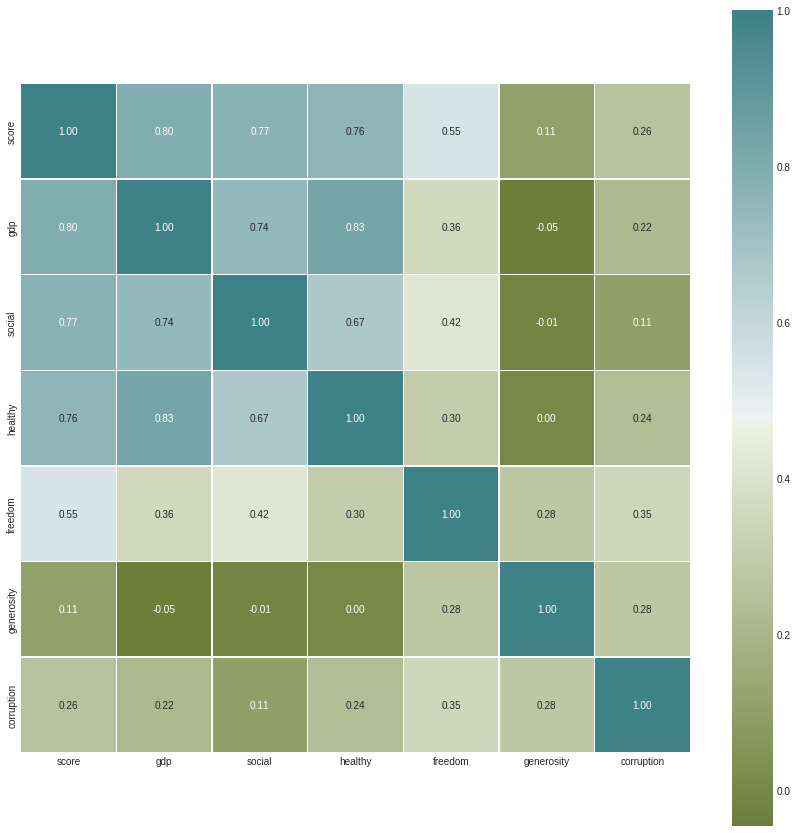

In [51]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(matrizCorrNoNorm, annot=True, linewidths=.5, fmt='.2f', 
            mask= np.zeros_like(matrizCorrNoNorm,dtype=np.bool), 
            cmap=sns.diverging_palette(100,200,as_cmap=True), 
            square=True, ax=ax)

plt.show()

##**5. Regresión lineal multivariable:**

Se ajusta nuestro dataFrame al modelo de regresión lineal, para esto separaremos nuestras ***features*** de nuestra variable ***target (score)*** de la siguiente manera:

In [52]:
X = df.drop("score",axis=1)
y = df["score"]

##**5.1 Entrenamiento:**

Se divide nuestro dataFrame en datos de entrenamiento y datos de prueba donde indicaremos la cantidad porcentual de datos que queremos para prueba y el restante serán datos de entrenamiento. Indicaremos a nuestro método que no seleccione muestras aleatorias usando ***shuffle = False***. Para saber la cantidad de datos para entrenamiento usaremos el método ***.shape*** en la variable de las ***features***.

In [53]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)
print(" Shape of x_train = ", X_train.shape)
print(" Shape of x_test = ", X_test.shape)
print(" Shape of y_train = ", y_train.shape)
print(" Shape of y_test = ", y_test.shape)

 Shape of x_train =  (248, 6)
 Shape of x_test =  (63, 6)
 Shape of y_train =  (248,)
 Shape of y_test =  (63,)


##**5.2 Creación del modelo:**

Se crea el objeto del modelo de regresión lineal normalizado, para esto indicaremos a nuestro objeto ***LinearRegression(normalize = True)***. A continuación, entrenaremos el modelo enviando los datos de entrenamiento tanto ***features*** como ***target*** seleccionados en el paso anterior.


In [54]:
# Creacion del modelo con sci-kit learn
ModeloLRNorm = LinearRegression(normalize = True)
ModeloLRNorm.fit(X_train, y_train)

LinearRegression(normalize=True)

In [55]:
X_train

,gdp,social,healthy,freedom,generosity,corruption
0,1.305,1.592,0.874,0.681,0.202,0.393
1,1.456,1.582,0.861,0.686,0.286,0.340
2,1.351,1.590,0.868,0.683,0.284,0.408
3,1.343,1.644,0.914,0.677,0.353,0.138
4,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...
88,0.801,0.782,0.782,0.418,0.036,0.076
89,1.043,1.147,0.769,0.351,0.035,0.182
90,0.987,1.224,0.815,0.216,0.166,0.027
91,0.931,1.203,0.660,0.491,0.498,0.028


In [56]:
X_test

,gdp,social,healthy,freedom,generosity,corruption
93,0.741,1.346,0.851,0.543,0.147,0.073
94,0.813,1.321,0.604,0.457,0.370,0.167
95,0.549,0.910,0.331,0.381,0.187,0.037
96,1.092,1.513,0.815,0.311,0.081,0.004
97,0.611,0.868,0.486,0.381,0.245,0.040
...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.411
152,0.476,0.885,0.499,0.417,0.276,0.147
153,0.350,0.517,0.361,0.000,0.158,0.025
154,0.026,0.000,0.105,0.225,0.235,0.035


##**5.2 Resultados:**

In [57]:
print("Intercepto : " , ModeloLRNorm.intercept_)
print("Pendiente : " , ModeloLRNorm.coef_)
print("Coeficiente de determinación R^2:", ModeloLRNorm.score(X, y))

Intercepto :  1.7827282108771052
Pendiente :  [0.67824247 1.19101733 1.25830839 1.37844189 0.49973698 0.8820617 ]
Coeficiente de determinación R^2: 0.7811867001827546


##**5.3 Predicciones del modelo:**

In [58]:
y_pred = ModeloLRNorm.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real Values"])
pd.concat([y_test_df , y_pred_df] , axis=1)

,Real Values,Predicted Values
0,5.175,5.845581
1,5.082,5.629646
2,5.044,4.306683
3,5.011,5.823602
4,4.996,4.525380
...,...,...
58,3.334,4.881637
59,3.231,4.629919
60,3.203,3.191128
61,3.083,2.390945


##**5.3 Cálculo de errores:**

In [59]:
# Calculando la cantidad de error del modelo
MSE = mean_squared_error(y,ModeloLRNorm.predict(X))
RMSE = np.sqrt(MSE)

print("Error cuadratico medio: ", MSE)
print("Raiz cuadratica media: ", RMSE)

Error cuadratico medio:  0.27050489528567023
Raiz cuadratica media:  0.5201008510718572


##**5.4 Tabla de coeficientes $(\theta)$ modelo Python Sci-kit learn:**

In [60]:
estimatePy = pd.DataFrame(zip(X.columns, ModeloLRNorm.coef_), columns = ['features', 'theta(θ) Sklearn'])
estimatePy

,features,theta(θ) Sklearn
0,gdp,0.678242
1,social,1.191017
2,healthy,1.258308
3,freedom,1.378442
4,generosity,0.499737
5,corruption,0.882062
